# A Quantitative Analysis of Dominant Champions League Winners

For this project I decided to analyse who was the best of the best. Which UEFA Champions League Winner had the most dominant win in their respective season by comparing it to the other teams. I first shortlisted a small circle of teams that I would analyse. I showed this in **TeamRanked.ipynb** by picking 4 teams of the entire era and a separate 5 teams of the modern era which offered more advanced metrics.

In [ ]:
%pip install pandas matplotlib seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Main Shortlist

In [3]:
MainShortlist =pd.read_csv('MainShortlist.csv')
print(MainShortlist)

                  Team
0      Barcelona 08/09
1      Barcelona 10/11
2    Real Madrid 17/18
3  Bayern Munich 19/20


The next thing I did was set up the csv files for each of the team's in the MainShortlist and then set them into a DataFrame. I collected this information for the csv files from the website [Fbref](https://fbref.com/en/).

In [23]:
Barca09 = pd.read_csv('Barcelona08_09.csv')
Barca09['Team'] = 'Barcelona 08/09'
Barca11 = pd.read_csv('Barcelona10_11.csv')
Barca11['Team'] = 'Barcelona 10/11'
Madrid18 = pd.read_csv('RealMadrid17_18.csv')
Madrid18['Team'] = 'Real Madrid 17/18'
Bayern20 = pd.read_csv('BayernMunich19_20.csv')
Bayern20['Team'] = 'Bayern Munich 19/20'

Then with the new DataFrames I concatenated them all together into one main DataFrame.

In [ ]:
AllTeams = [Barca09, Barca11, Madrid18, Bayern20]
UCLTeams = pd.concat(AllTeams)
print(UCLTeams)

I then added important metrics that can help me compare the teams together such as "Outcome" (The result of win,draw or loss), "Points" (3 if a Win, 1 if a Draw, 0 else), "CleanSheet" (True if Goals Against are 0 and False otherwise).

In [52]:
UCLTeams["Outcome"] = np.where(UCLTeams["GF"] > UCLTeams["GA"], 'Win', 
                      np.where(UCLTeams["GF"] < UCLTeams["GA"], 'Loss', 'Draw'))
UCLTeams["Points"] = np.where(UCLTeams["Outcome"] == 'Win', 3, 
                      np.where(UCLTeams["Outcome"] == 'Draw', 1, 0))
UCLTeams["CleanSheet"] = np.where(UCLTeams["GA"] == 0, True, False)
print(UCLTeams)

          Date                   Round    Venue        Opponent  GF  GA  \
0   13-08-2008  Third qualifying round     Home    Wisła Kraków   4   0   
1   26-08-2008  Third qualifying round     Away    Wisła Kraków   0   1   
2   16-09-2008             Group stage     Home     Sporting CP   3   1   
3   01-10-2008             Group stage     Away        Shakhtar   2   1   
4   22-10-2008             Group stage     Away           Basel   5   0   
5   04-11-2008             Group stage     Home           Basel   1   1   
6   26-11-2008             Group stage     Away     Sporting CP   5   2   
7   09-12-2008             Group stage     Home        Shakhtar   2   3   
8   24-02-2009             Round of 16     Away            Lyon   1   1   
9   11-03-2009             Round of 16     Home            Lyon   5   2   
10  08-04-2009          Quarter-finals     Home   Bayern Munich   4   0   
11  14-04-2009          Quarter-finals     Away   Bayern Munich   1   1   
12  28-04-2009           

Now it was the next part to aggregate these metrics into a table that let me compare the teams through single seasons. 

In [54]:
SummaryTable = UCLTeams.groupby('Team').agg(
    AVGPoints = ('Points', 'mean'),
    TotalGoals = ('GF', 'sum'),
    AVGGoalsFor = ('GF', 'mean'),
    AVGGoalsAgainst = ('GA', 'mean'),
    TotalCleanSheets = ('CleanSheet', 'sum')
)

print(SummaryTable)

                     AVGPoints  TotalGoals  AVGGoalsFor  AVGGoalsAgainst  \
Team                                                                       
Barcelona 08/09       1.933333          36     2.400000         0.933333   
Barcelona 10/11       2.307692          30     2.307692         0.692308   
Bayern Munich 19/20   3.000000          43     3.909091         0.727273   
Real Madrid 17/18     2.230769          33     2.538462         1.230769   

                     TotalCleanSheets  
Team                                   
Barcelona 08/09                     5  
Barcelona 10/11                     5  
Bayern Munich 19/20                 6  
Real Madrid 17/18                   3  


After getting this SummaryTable I decided to visualise the different metrics between each team.

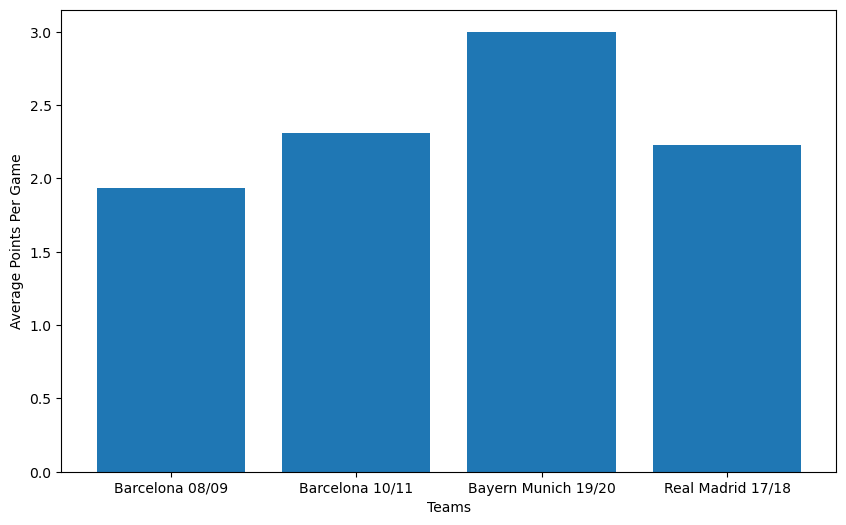

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(SummaryTable.index, SummaryTable['AVGPoints'])
plt.xlabel("Teams")
plt.ylabel("Average Points Per Game")
plt.show()

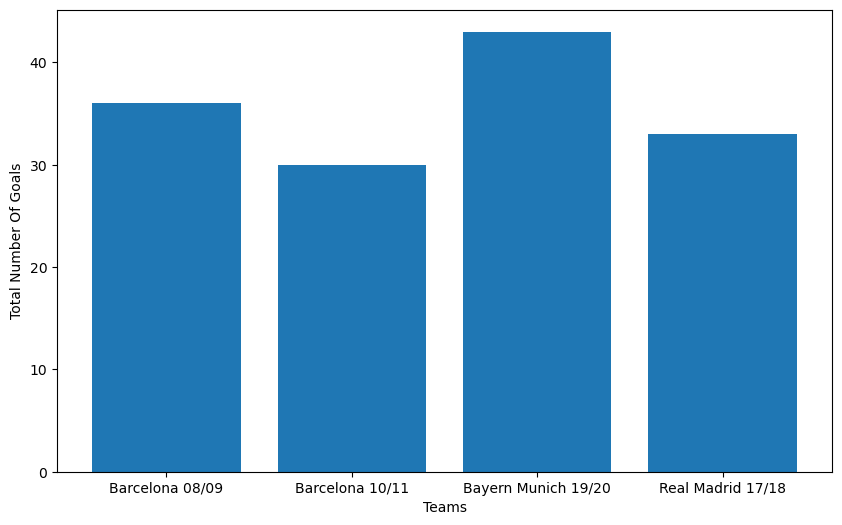

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(SummaryTable.index, SummaryTable['TotalGoals'])
plt.xlabel("Teams")
plt.ylabel("Total Number Of Goals")
plt.show()

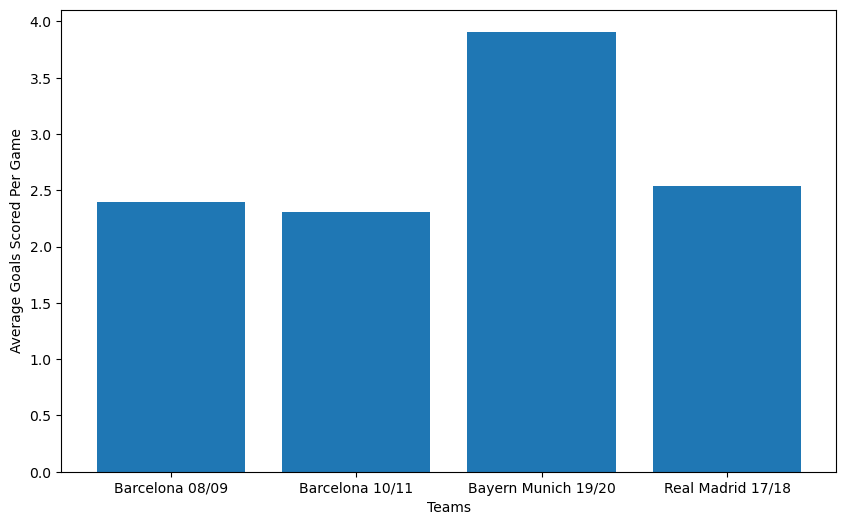

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(SummaryTable.index, SummaryTable['AVGGoalsFor'])
plt.xlabel("Teams")
plt.ylabel("Average Goals Scored Per Game")
plt.show()

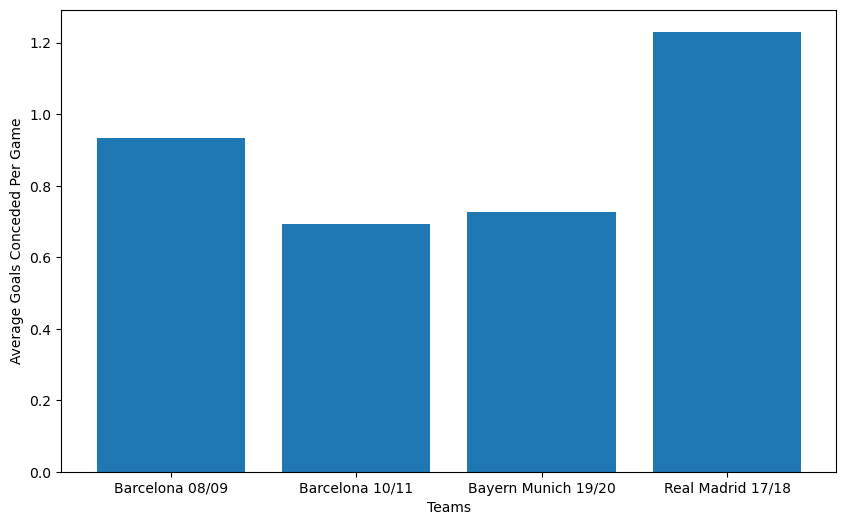

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(SummaryTable.index, SummaryTable['AVGGoalsAgainst'])
plt.xlabel("Teams")
plt.ylabel("Average Goals Conceded Per Game")
plt.show()

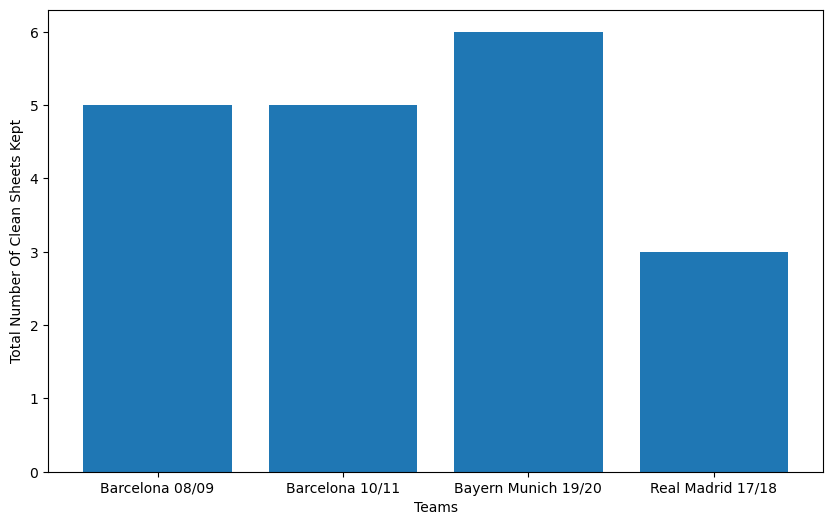

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(SummaryTable.index, SummaryTable['TotalCleanSheets'])
plt.xlabel("Teams")
plt.ylabel("Total Number Of Clean Sheets Kept")
plt.show()